## 決策樹

### 讀取iris 資料

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [10]:
iris.data[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 建立決策樹模型

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [25]:
? tree.DecisionTreeClassifier()

In [16]:
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 產生預測結果

In [17]:
predicted = clf.predict(iris.data)

In [18]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 做單筆資料預測

In [19]:
import numpy as np
s = np.array([[5,3,1.5,0.5]])
clf.predict(s)

array([0])

### 驗證準確度

In [23]:
sum(iris.target == predicted) / len(predicted)

1.0

### 匯出決策過程

In [24]:
tree.export_graphviz(clf, out_file='tree.dot')

### 使用webgraphviz 做視覺化
- http://www.webgraphviz.com/

### 限制深度

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
predicted = clf.predict(iris.data)

In [28]:
sum(iris.target == predicted) / len(predicted)

0.96

In [29]:
tree.export_graphviz(clf, out_file='tree2.dot')

## 繪製決策邊界

In [53]:
X = iris.data[:,[2,3]]
y = iris.target

In [54]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [55]:
tree.export_graphviz(clf, out_file='tree3.dot')

In [56]:
import matplotlib.pyplot as plt
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

In [57]:
plt.plot()
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

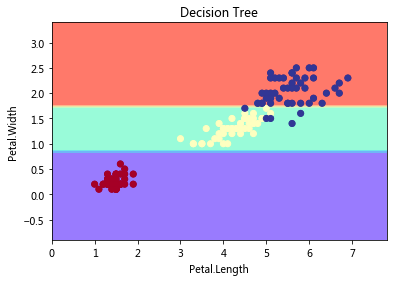

In [63]:
plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.rainbow)
plt.scatter(X[:,0],X[:,1],c=y,alpha=1,cmap=plt.cm.RdYlBu)
plt.title('Decision Tree')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()
#plt.savefig('decision_tree.png')

## 邏輯式迴歸

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(iris.data, iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
predicted = clf.predict(iris.data)

In [68]:
sum(predicted == iris.target) / len(iris.target)

0.96

### 繪製決策邊界

In [69]:
X = iris.data[:,[2,3]]
y = iris.target

In [70]:
clf = LogisticRegression()
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
predicted2 = clf.predict(X)
sum(predicted2 == y) / len(y)

0.8733333333333333

In [71]:
import matplotlib.pyplot as plt
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))

In [72]:
plt.plot()
Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)

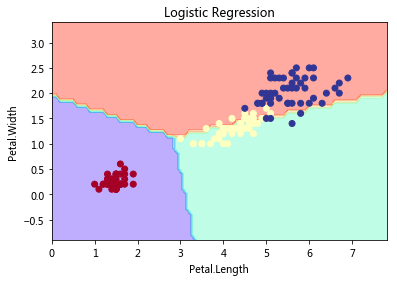

In [73]:
plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.rainbow)
plt.scatter(X[:,0],X[:,1],c=y,alpha=1,cmap=plt.cm.RdYlBu)
plt.title('Logistic Regression')
plt.xlabel('Petal.Length')
plt.ylabel('Petal.Width')
plt.show()

## 支持向量機 (SVM)

In [80]:
from sklearn.svm import SVC
X=iris.data[0:100,[2,3]]
y=iris.target[0:100]

In [81]:
clf1=SVC(kernel="linear")
clf1.fit(X,y)

clf2=LogisticRegression()
clf2.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
def plot_estimator(estimator,X,y):
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    
    Z=estimator.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()

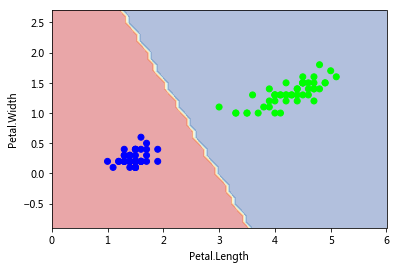

In [84]:
plot_estimator(clf1, X, y)

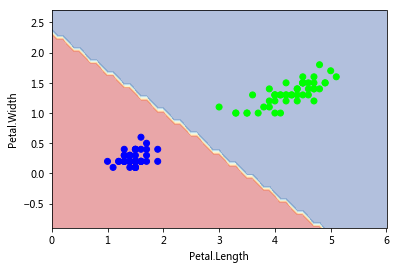

In [85]:
plot_estimator(clf2, X, y)

In [86]:
data=np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1],[1,1,1],[-0.4,0.5,1],[2,5,1]])
X=data[:,:2]
Y=data[:,2]

### 調整正則項 (Regularization Term)

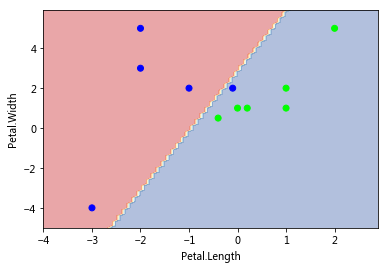

In [87]:
# Large Margin
clf=SVC(C=1.0,kernel='linear')
clf.fit(X,Y)
plot_estimator(clf,X,Y)

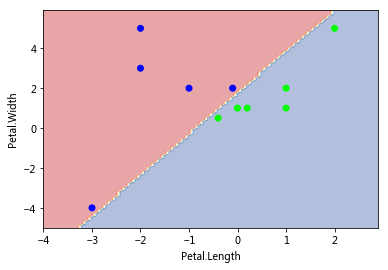

In [88]:
# Narrow Margin
clf=SVC(C=100000,kernel='linear')
clf.fit(X,Y)
plot_estimator(clf,X,Y)

### 調整Kernel

In [89]:
X=iris.data[:,[2,3]]
y=iris.target

In [90]:
clf1=SVC(kernel="rbf")
clf1.fit(X,y)

clf2=SVC(kernel="poly")
clf2.fit(X,y)

clf3=SVC(kernel="linear")
clf3.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['title', 'clf', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


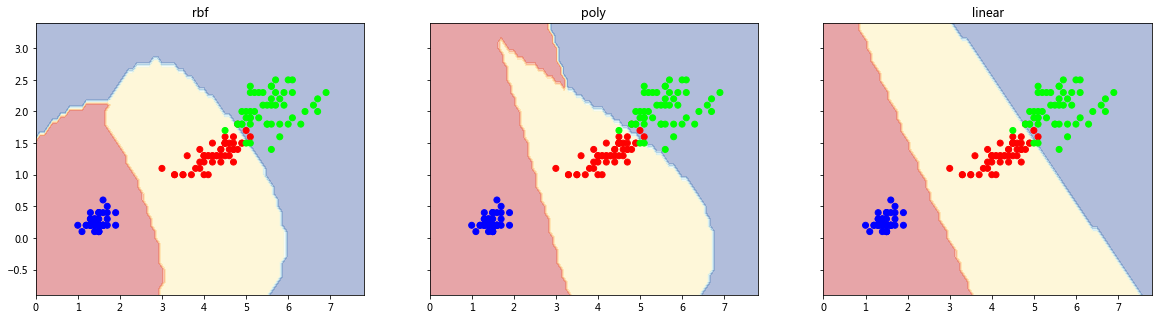

In [92]:
%pylab inline
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
f,axarr=plt.subplots(1,3,sharex='col',sharey='row',figsize=(20,5))
for idx,clf,title in zip([0,1,2],[clf1,clf2,clf3],['rbf','poly','linear']):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    axarr[idx].contourf(xx,yy,Z,alpha=0.4,cmap=plt.cm.RdYlBu)
    axarr[idx].scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.brg)
    axarr[idx].set_title(title)

In [94]:
sum(clf1.predict(X) == y) / len(y)

0.9666666666666667

In [96]:
sum(clf2.predict(X) == y) / len(y)

0.96

In [97]:
sum(clf3.predict(X) == y) / len(y)

0.9666666666666667